In [1]:
import sys, os
import datetime
from settings import *

sys.path.insert(0, PYSBF_PATH)
from pysbf import *


from IPython.display import display, Markdown, clear_output
warnings.filterwarnings('ignore')

import IPython
IPython.display.HTML('<style> select, textarea, input { font-family: Courier New; } </style>')


## Set galaxy name

In [2]:
name = "u12517"

In [3]:
IN_FOLDER, OUT_FOLDER

('/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3/',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/output/')

In [4]:
outFolder = OUT_FOLDER + "Outputs_"+name+'/'
logFile = outFolder+name+"_model_log.csv"

df_log = open_log_df(logFile)
uuid = df_log.at["uuid", "value"]

X0 = int(float(df_log.at["X0", "value"])) # Object Center X0 [pixel]
Y0 = int(float(df_log.at["Y0", "value"])) # Object Center X0 [pixel]
XX = int(float(df_log.at["X_pixels", "value"]))
YY = int(float(df_log.at["Y_pixels", "value"]))
# _ = Logtext(logFile, "log file")

# df_log

- not different by a lot
- model pswf --> blur psf
- trying multiple psf --> averaging out the results, or using them for error measuremnt
- combinedj.on.bright.psf.14219 sharpest one, good starting 
- PSFstd --> mode l psf from space teelscope
- PSF = inFolder+"/psflibrary/PSFSTD_WFC3IR_F110W.fits"

In [5]:
PSF = IN_FOLDER+"/psflibrary/combinedj.on.psf.14654"  # --> refer to the project
PSF = "/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/wfc3-16262/e137024/e137j.psf3"

In [6]:
! ls {IN_FOLDER}"/psflibrary/combined*"

ls: cannot access '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combined*': No such file or directory


In [7]:
import glob

psf_list = glob.glob(IN_FOLDER+"/psflibrary/combinedj*")
psf_list

['/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.psf.14219',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.on.psf.14654',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.on.psf.14219',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.psf.11712',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.on.bright.psf.14219',
 '/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/notebooks/data/wfc3//psflibrary/combinedj.bright.psf.14219']

point source mask, comes from likenew6 (tuned for infrared bands)

- ptm6 default output of likenew: sometimes misses objects that are super bright
- ptm6b --> produced after further manipulations

In [8]:
DIR = "{}{}_{}/".format(outFolder, name, uuid)

config = {
    "DIR": DIR,
    "PSF": PSF,
    "PRF": "model.000",
    "RSD": "resid.000",
#     "PTM": "{}_se_lknjj.ptm6b".format(name),
    "PTM": "{}/hybridj.ptm6b".format(DIR),
    }

W = SBF_widgets(XX, YY, X0, Y0, **config)

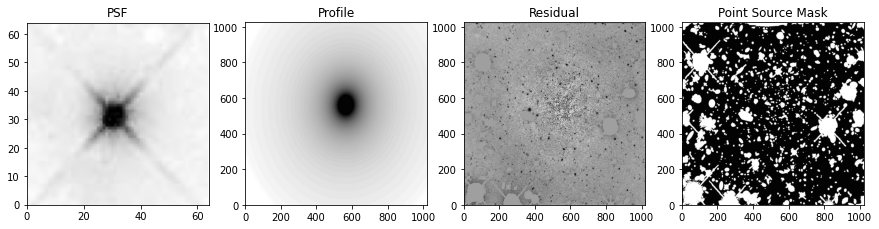

In [9]:
_ = eval_plots(config)

In [10]:
W.settings()

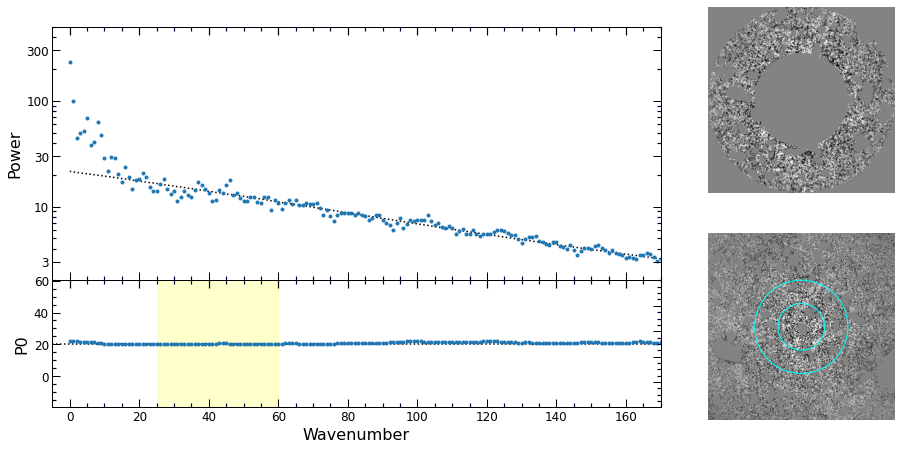

In [11]:
(ax1, ax2, ax3, ax4), psf_info, P0 = W.get_sbf()
# ax2.set_ylim(130, 140)

## PSF power spectrum

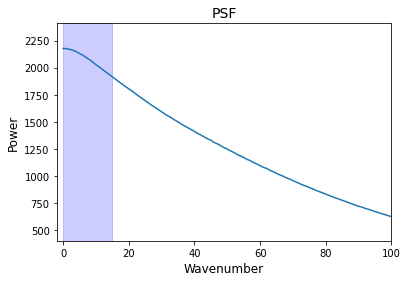

In [12]:
ax = plot_psf_power(psf_info, K_upper_limit = 100)

In [13]:
W.get_sbf_all(angle_range=(10,180))

0 32 - 64
1 64 - 128
2 128 - 256


{'c0': (22.6, 0.563), 'c1': (21.07, 0.19), 'c2': (15.53, 0.145)}

In [14]:
# P0, dP0
W.get_sbf_all()

0 32 - 64
1 64 - 128
2 128 - 256


{'c0': (22.06, 0.352), 'c1': (20.22, 0.159), 'c2': (15.61, 0.158)}

In [15]:
len(psf_list)

6

In [16]:
W.get_sbf_iter(n_iter=50, psf_list=psf_list)

{'iter000': (19.98, 0.128),
 'iter001': (20.22, 0.169),
 'iter002': (21.64, 0.476),
 'iter003': (19.19, 0.196),
 'iter004': (19.36, 0.122),
 'iter005': (20.47, 0.266),
 'iter006': (19.5, 0.371),
 'iter007': (22.88, 1.29),
 'iter008': (18.99, 0.15),
 'iter009': (22.08, 1.09),
 'iter010': (20.04, 0.337),
 'iter011': (19.49, 0.242),
 'iter012': (20.24, 0.176),
 'iter013': (20.64, 0.188),
 'iter014': (21.38, 0.502),
 'iter015': (19.97, 0.138),
 'iter016': (21.21, 0.521),
 'iter017': (19.55, 0.12),
 'iter018': (20.48, 0.674),
 'iter019': (19.03, 0.146),
 'iter020': (20.16, 0.149),
 'iter021': (21.21, 0.587),
 'iter022': (21.29, 0.235),
 'iter023': (21.44, 0.599),
 'iter024': (19.65, 0.32),
 'iter025': (19.6, 0.269),
 'iter026': (19.18, 0.137),
 'iter027': (19.86, 0.211),
 'iter028': (19.04, 0.161),
 'iter029': (20.15, 0.137),
 'iter030': (21.63, 0.96),
 'iter031': (21.09, 1.06),
 'iter032': (19.32, 0.291),
 'iter033': (19.49, 0.165),
 'iter034': (20.41, 0.128),
 'iter035': (20.31, 0.119),
 